In [ ]:
# 1. Backtesting script (.py)
# 2. Golden dragon (long term and mid term)
# 3. Backtest: 1h, 4h, 1D and 1W.
# todo: 3.1 4h implement separately, because Yahoo Finance doesn't support it
# 4. Backtest through Yahoo finance.
# todo: 5. Backtest more than 1 stock at once
# 6. Implement separated backtesting graphs:
# - Profit/Loss (money)
# - Profit/loss in %
# - Positions value (money).
# - Dates.
# - Buy/sell dots on where it bought and sold on the stock graph.
# todo: 7. IF there is a period where the value (money) went to 0 the backtest still needs to keep running after that period even if the bot cant buy any more stocks. (In most backtests the backtest will stop per default if the value (money) goes to 0. Because this is a backtest to not buy the underlying but for buying the real company (the stock) the backtest needs to continue even if the value goes to 0. You still own the stocks in that option)
# todo: 8. It needs to measure total capital that was measured during specific periods. Example: the bot bought 5 stocks and at another time additional 2 stocks. The val (Money) for this period is 60 then the value (money) increased to 80 because of the additional 2 stocks, you now have only 20 in value (money left) to buy stocks for. This measures how exposed/how much capital you used during certain periods its then easier to adjust the first buying value of stock.
# todo: 9. (Additional, to be added to the strategy) It needs to be able to buy on 1h - 1w graphs.
# todo: 10. (Additional) STOP LOSS /sell signal (False/true). If the stop loss is set to false, then the bot needs to hold the stock instead of selling it, it then needs to use its "martingale" method to buy at the next buy signal instead. You then average down on your value of the total stocks, But it cant take profit on negative if the average down still is negative even if the bot wants to take profit. If their is a positive amount on the average value of stocks after the second time it bought and the bot got the sell signal as normal its fine. Example you have 10 stocks you bought at 100. You then buy additional 20 stocks at 50. Your average of stocks is = 66.
# todo: try fresh install on a new env

In [ ]:
!pip install vectorbt

In [2]:
import vectorbt as vbt


def backtest_strategy(ticker, start_date, timeframe, fast_ma_period, slow_ma_period):
    price = vbt.YFData.download(ticker, start=start_date, interval=timeframe).get('Close')
    fast_ma = vbt.MA.run(price, fast_ma_period, short_name=f'fast_ma_{fast_ma_period}')
    slow_ma = vbt.MA.run(price, slow_ma_period, short_name=f'slow_ma_{slow_ma_period}')
    entries = fast_ma.ma_crossed_above(slow_ma)
    exits = fast_ma.ma_crossed_below(slow_ma)
    pf = vbt.Portfolio.from_signals(price, entries, exits, fees=0.005)
    plot_strategy(price, fast_ma, slow_ma, pf, timeframe)
    print(f'\nUseful stats of the backtesting: \n\n{pf.stats()}')
    print(f'\nInformation about the orders: \n\n{pf.orders.records_readable}')


def plot_strategy(price, fast_ma, slow_ma, pf, timeframe):
    fig = price.vbt.plot(trace_kwargs=dict(name=f'Close ({timeframe})'))
    fast_ma.ma.vbt.plot(trace_kwargs=dict(name=f'Fast MA ({timeframe})'), fig=fig)
    slow_ma.ma.vbt.plot(trace_kwargs=dict(name=f'Slow MA ({timeframe})'), fig=fig)
    pf.positions.plot(close_trace_kwargs=dict(visible=False), fig=fig)
    fig.show_png()
    pf.plot(title='Metrics').show_png()

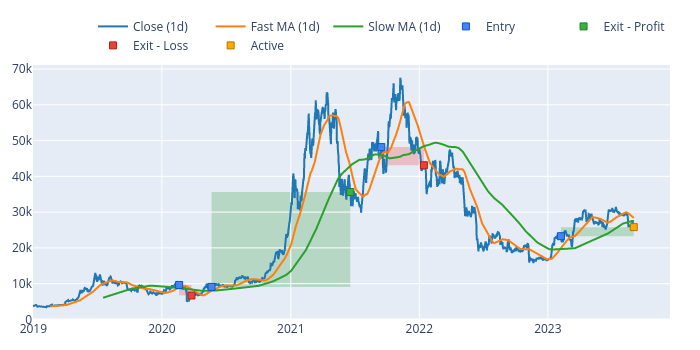

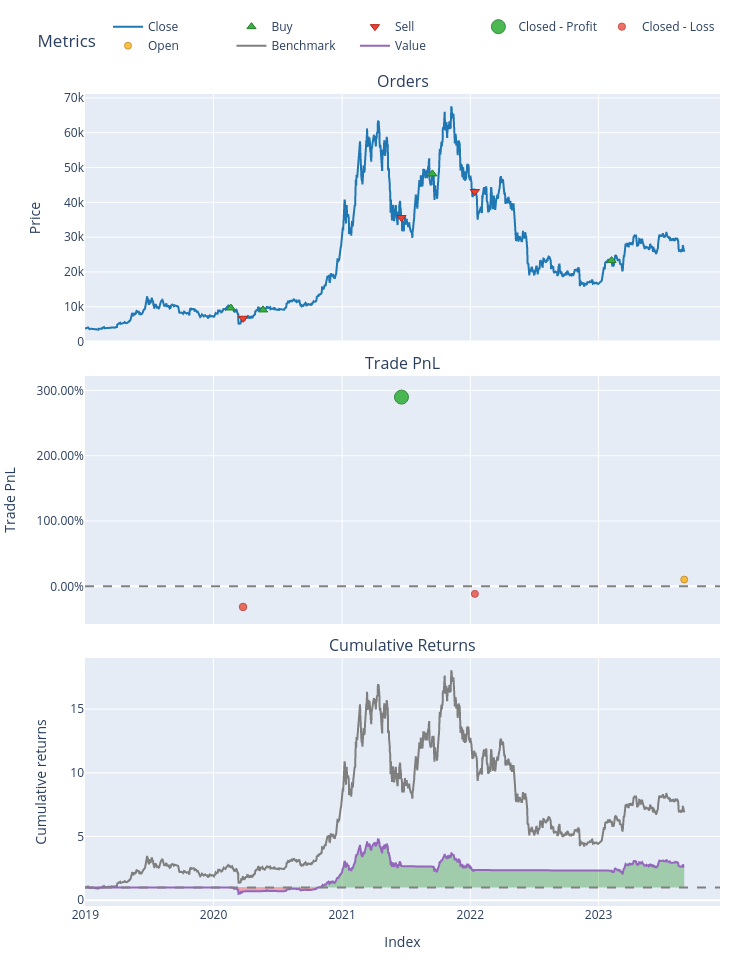


Useful stats of the backtesting: 

Start                         2018-12-31 00:00:00+00:00
End                           2023-09-02 00:00:00+00:00
Period                               1707 days 00:00:00
Start Value                                       100.0
End Value                                    260.580344
Total Return [%]                             160.580344
Benchmark Return [%]                          589.38369
Max Gross Exposure [%]                            100.0
Total Fees Paid                                6.211551
Max Drawdown [%]                              57.323596
Max Drawdown Duration                 872 days 00:00:00
Total Trades                                          4
Total Closed Trades                                   3
Total Open Trades                                     1
Open Trade PnL                                24.450183
Win Rate [%]                                  33.333333
Best Trade [%]                               289.708341
Worst Trade 

In [3]:
# Define parameters of the backtesting
ticker = 'BTC-USD'  # todo: implement for portfolio
start_date = '2019-01-01'
timeframe = '1d'  # choose any interval from [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]
fast_ma_period = 50
slow_ma_period = 200

# Run backtesting
backtest_strategy(ticker, start_date, timeframe, fast_ma_period, slow_ma_period)